### Check that Auxtel targets look reasonable:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import astropy_mpl_style, quantity_support

plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7f8d89f562d0>

In [2]:
import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord, get_sun
from astropy.time import Time

In [3]:
piprog = np.loadtxt('/home/c/csaunder/stack_projects/auxtel/piprog.list', dtype=str)
piprog

array([['05:50:29.23', '-41:53:20.7', '0.53', '193771', '15.75',
        '-1.000'],
       ['06:33:09.67', '-68:34:30.2', '0.75', '195691', '15.90',
        '-1.000'],
       ['06:31:46.39', '-64:26:15.2', '0.89', '195557', '15.86',
        '-1.000'],
       ['05:17:07.62', '-44:10:55.6', '1.71', '191333', '14.41',
        '-1.000'],
       ['06:53:35.25', '-39:55:29.7', '0.64', '1710', '15.35', '40.304'],
       ['06:57:05.50', '-39:09:38.1', '0.83', '1719', '14.98', '60.596'],
       ['05:05:52.65', '-17:22:32.9', '1.05', '1282', '15.78', '51.725'],
       ['06:50:42.13', '-50:33:31.3', '3.08', '1697', '14.15', '43.122'],
       ['05:18:36.59', '-28:41:59.7', '3.35', '1326', '14.22', '54.920'],
       ['06:13:57.46', '-34:36:58.2', '3.61', '1548', '14.22', '44.692'],
       ['05:53:26.49', '-71:33:43.4', '3.74', '1455', '14.09', '87.734']],
      dtype='<U11')

In [4]:
pachon = EarthLocation.of_site("Cerro Pachon")

In [34]:
target_coords = SkyCoord(ra=piprog[:,0], dec=piprog[:,1], unit=(u.hourangle, u.deg))
print(target_coords)

<SkyCoord (ICRS): (ra, dec) in deg
    [( 87.62179167, -41.88908333), ( 98.29029167, -68.57505556),
     ( 97.94329167, -64.43755556), ( 79.28175   , -44.18211111),
     (103.396875  , -39.92491667), (104.27291667, -39.16058333),
     ( 76.469375  , -17.37580556), (102.67554167, -50.55869444),
     ( 79.65245833, -28.69991667), ( 93.48941667, -34.61616667),
     ( 88.360375  , -71.56205556)]>


In [9]:
midnight_2023_10_05 = Time('2023-10-05 00:00:00') 
delta_midnight = np.linspace(-5, 12, 100)*u.hour
full_night_2023_10_05 = midnight_2023_10_05 + delta_midnight
frame_2023_10_05 = AltAz(obstime=full_night_2023_10_05, location=pachon)

midnight_2024_02_05 = Time('2024-02-05 00:00:00') 
delta_midnight = np.linspace(-5, 12, 100)*u.hour
full_night_2024_02_05 = midnight_2024_02_05 + delta_midnight
frame_2024_02_05 = AltAz(obstime=full_night_2024_02_05, location=pachon)

Target 193771


Text(0, 0.5, 'Airmass')

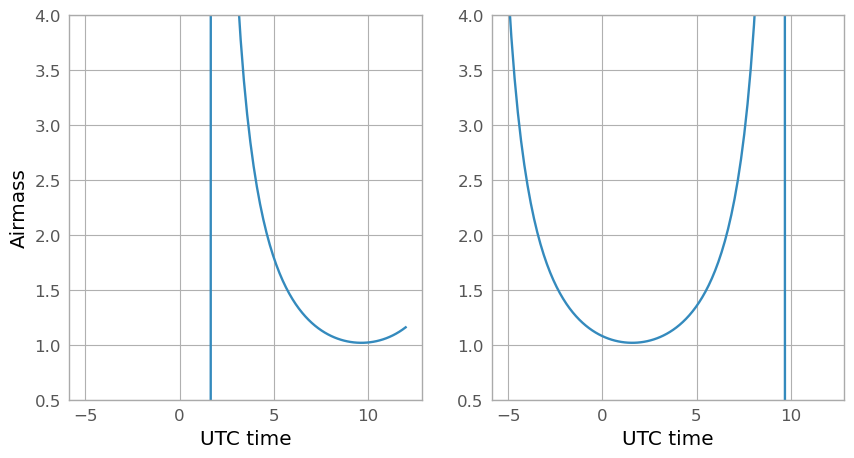

In [31]:
target = target_coords[0]
target_10_05 = target.transform_to(frame_2023_10_05)
target_10_05_airmass = target_10_05.secz

target_02_05 = target.transform_to(frame_2024_02_05)
target_02_05_airmass = target_02_05.secz
print("Target", piprog[0, 3])
fig, subs = plt.subplots(1, 2, figsize=(10, 5))
subs[0].plot(delta_midnight, target_10_05_airmass)
subs[0].set_ylim(0.5, 4)
subs[1].plot(delta_midnight, target_02_05_airmass)
subs[1].set_ylim(0.5, 4)
subs[0].set_xlabel("UTC time")
subs[1].set_xlabel("UTC time")
subs[0].set_ylabel("Airmass")

Target 193771


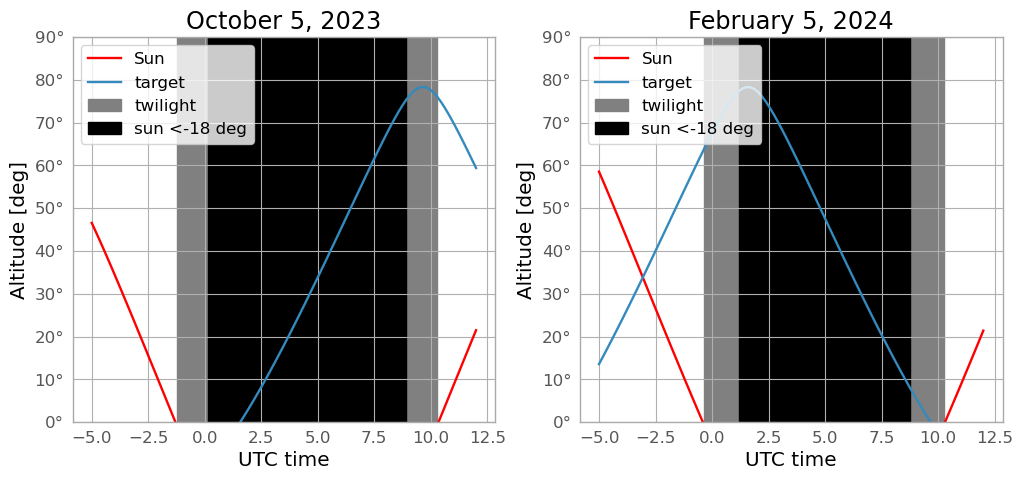

Target 195691


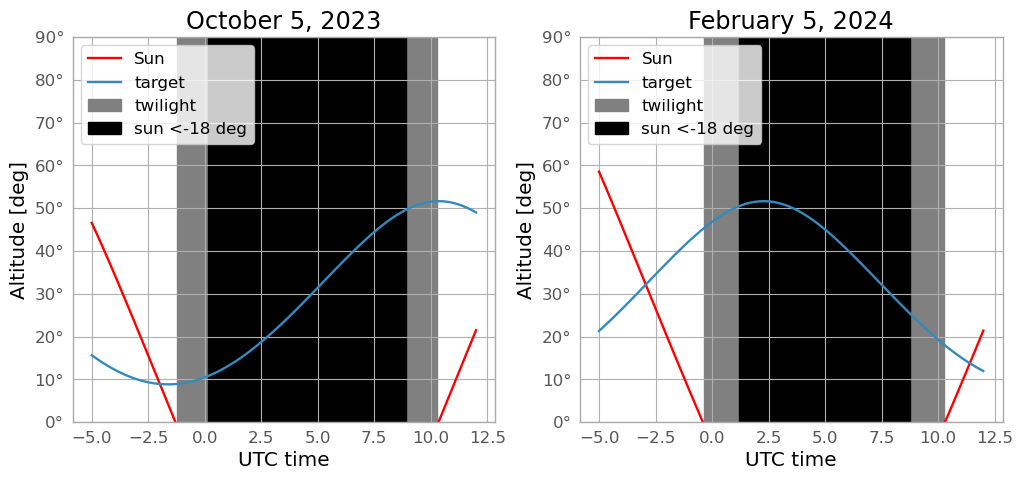

Target 195557


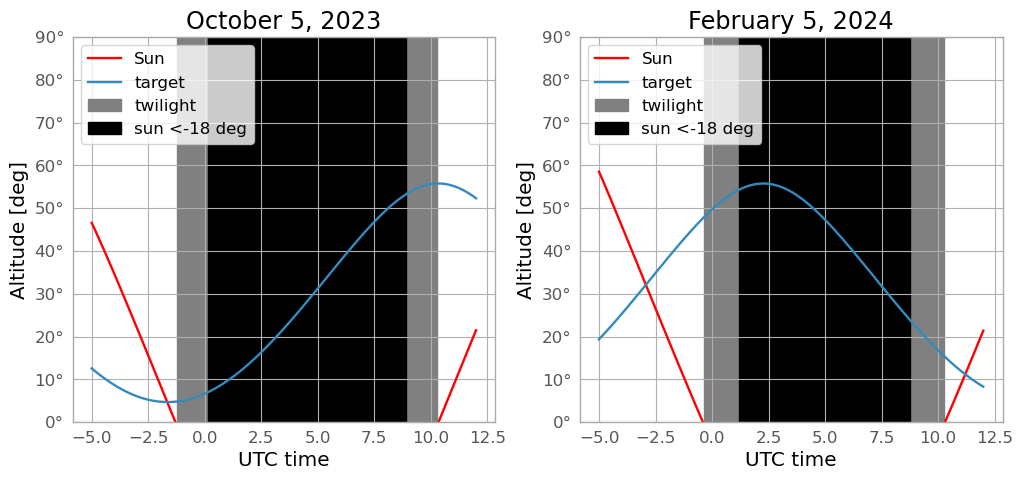

Target 191333


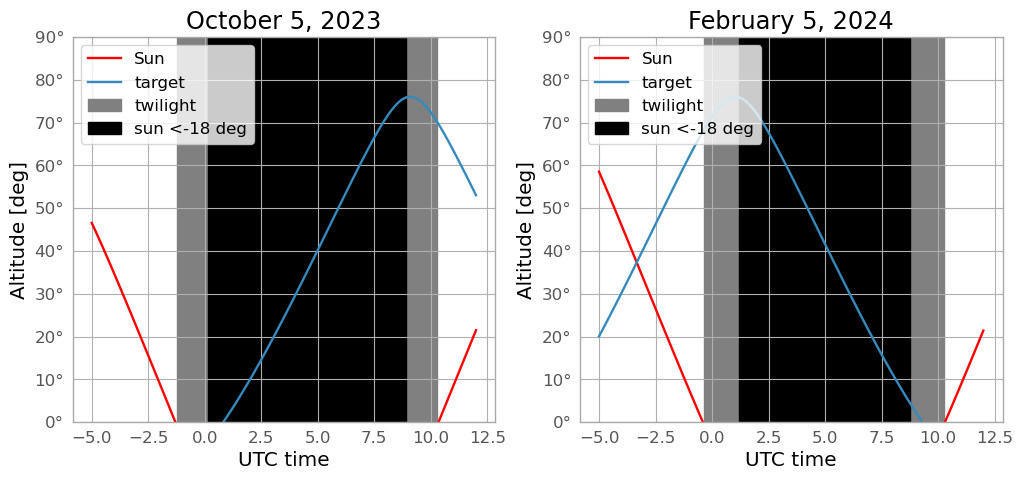

Target 1710


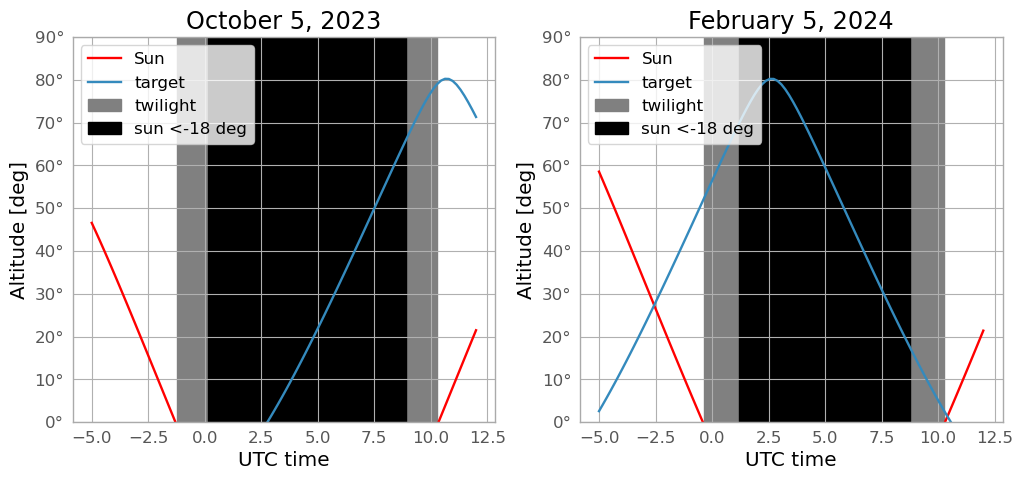

Target 1719


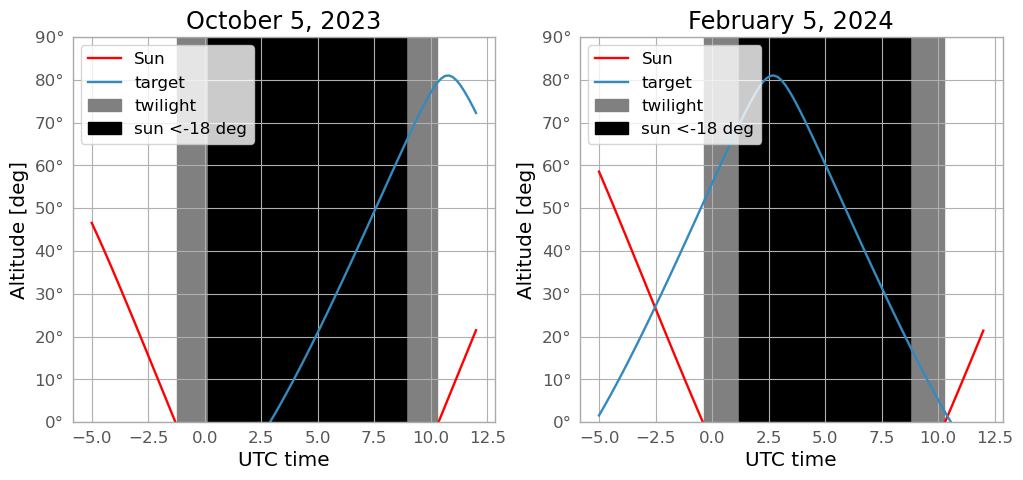

Target 1282


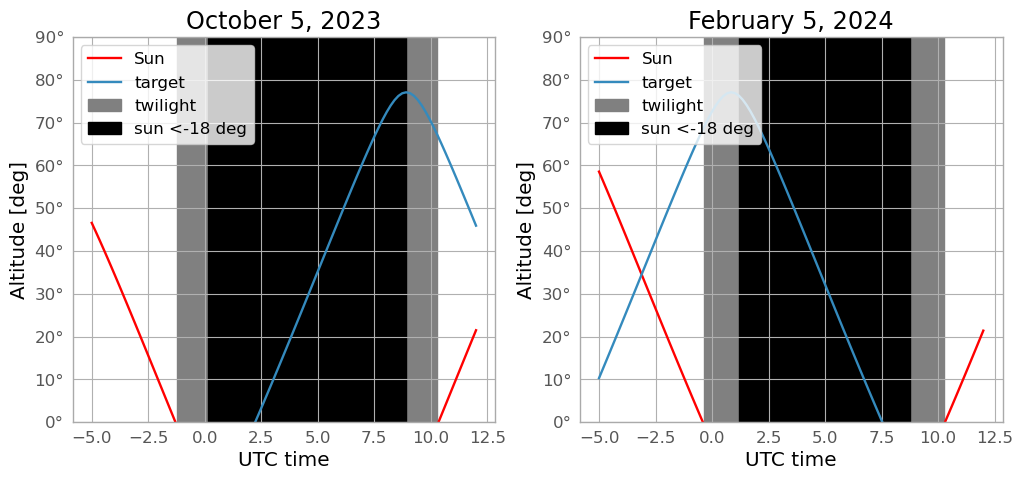

Target 1697


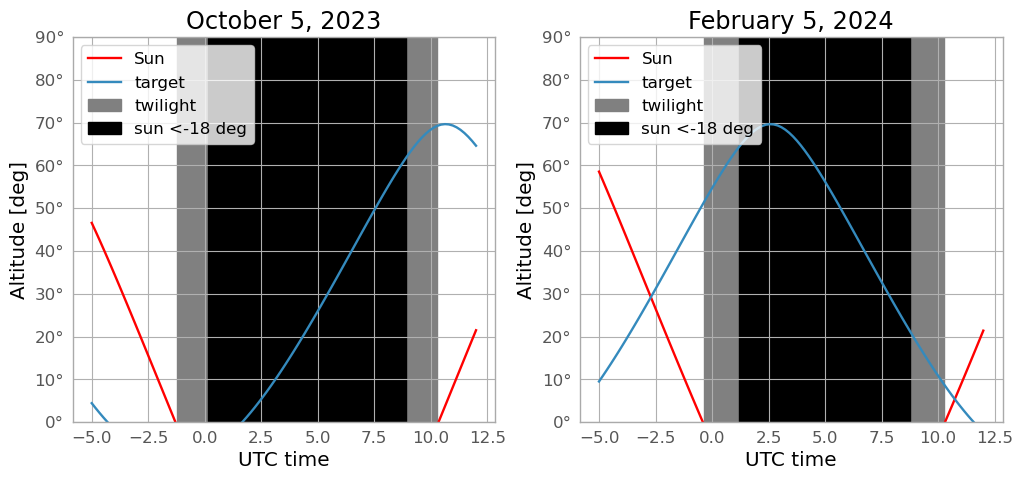

Target 1326


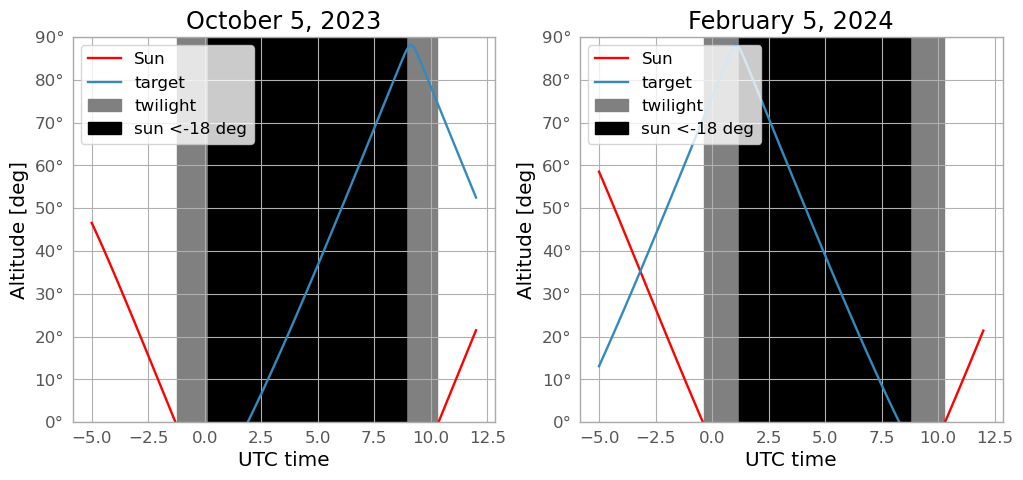

Target 1548


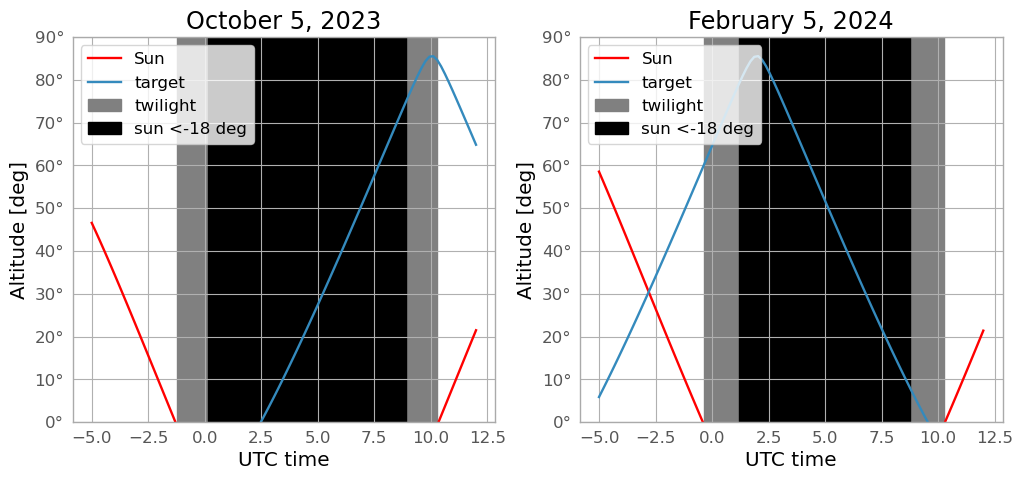

Target 1455


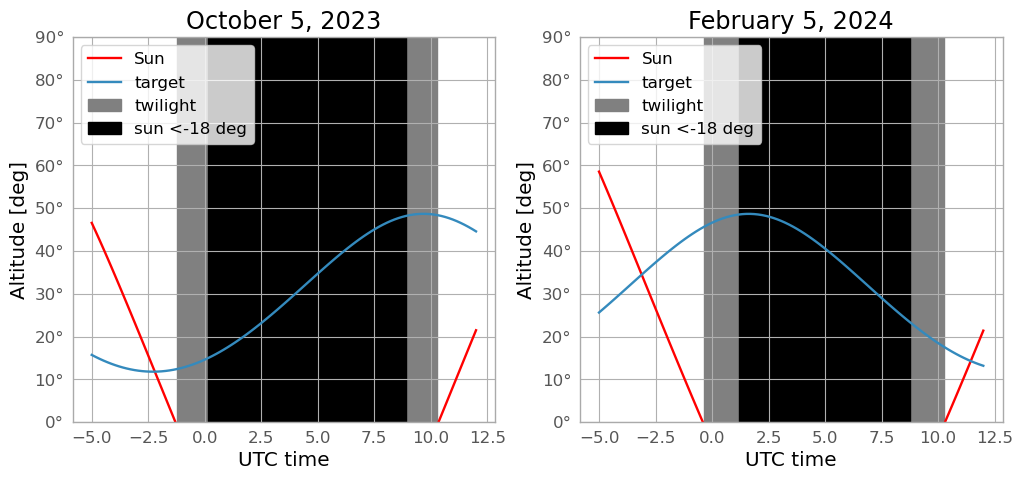

In [35]:
sunaltazs_2023_10_05 = get_sun(full_night_2023_10_05).transform_to(frame_2023_10_05)
sunaltazs_2024_02_05 = get_sun(full_night_2024_02_05).transform_to(frame_2024_02_05)

target = target_coords[0]
for t, target in enumerate(target_coords):
    print(f"Target {piprog[t,3]}")
    target_2023_10_05 = target.transform_to(frame_2023_10_05)
    target_2024_02_05 = target.transform_to(frame_2024_02_05)

    fig, subs = plt.subplots(1,2, figsize=(12,5))
    subs[0].plot(delta_midnight, sunaltazs_2023_10_05.alt, color='r', label='Sun')
    subs[0].plot(delta_midnight, target_2023_10_05.alt, label='target')
    subs[0].fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                     sunaltazs_2023_10_05.alt < -0*u.deg, color='0.5', zorder=0, label='twilight')
    subs[0].fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                     sunaltazs_2023_10_05.alt < -18*u.deg, color='k', zorder=0, label='sun <-18 deg')
    subs[0].legend(loc='upper left')
    subs[0].set_xlabel('UTC time')
    subs[0].set_ylim(0*u.deg, 90*u.deg)
    subs[0].set_ylabel('Altitude [deg]')

    subs[0].set_title('October 5, 2023')

    subs[1].plot(delta_midnight, sunaltazs_2024_02_05.alt, color='r', label='Sun')
    subs[1].plot(delta_midnight, target_2024_02_05.alt, label='target')
    subs[1].fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                     sunaltazs_2024_02_05.alt < -0*u.deg, color='0.5', zorder=0, label='twilight')
    subs[1].fill_between(delta_midnight, 0*u.deg, 90*u.deg,
                     sunaltazs_2024_02_05.alt < -18*u.deg, color='k', zorder=0, label='sun <-18 deg')
    subs[1].legend(loc='upper left')
    subs[1].set_ylim(0*u.deg, 90*u.deg)
    #plt.xticks((np.arange(13)*2-12)*u.hour)
    subs[1].set_xlabel('UTC time')
    subs[1].set_ylabel('Altitude [deg]')
    subs[1].set_title('February 5, 2024')
    plt.show()